# Demonstrate Pystareplotlib

A simple module for visualizing STARE encodings and harmonized data.

[Michael Rilee](mailto:mike@rilee.net)

STARE Spatio Temporal Adaptive Resolution Encoding for Integrative Data Analysis was supported by NASA ACCESS-17, Federal Award ID No. 80NSSC18M0118.

In [1]:
import pystare
import pystareplotlib
import pystareplotlib.pystareplotlib as psplot
from pystareplotlib.pystareplotlib import *

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.tri as tri
from matplotlib.colors import ListedColormap

import cartopy.crs as ccrs
import cartopy.feature as cf
from cartopy.geodesic import Geodesic

import numpy
import math

ERROR 1: PROJ: proj_create_from_database: Open of /nethome/mrilee/opt/anaconda3/envs/test-work/share/proj failed


In [2]:
# Define Global Constants and State Variables
# -------------------------------------------

# Set up the projection and transformation
# PROJ = ccrs.PlateCarree()
# PROJ = ccrs.Robinson()
PROJ = ccrs.Mollweide()
TRANSF = ccrs.Geodetic()
USR_SET_GLOBAL = True

# Plot options
usr_plot_options = {'projection': PROJ, 'transform': TRANSF}
DEFAULT_DPI = mpl.rcParamsDefault['figure.dpi']
mpl.rcParams['figure.dpi'] = 1.5 * DEFAULT_DPI
mpl.rcParams['legend.fontsize'] = 6

<Figure size 960x720 with 0 Axes>

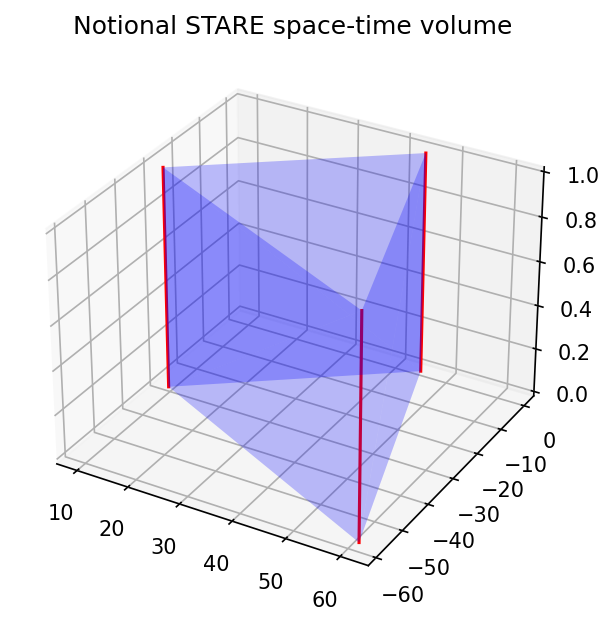

In [3]:
sp = stare_prism(siv=1,tiv_mock=[0,1])

fig = plt.figure() 
usr_figax = FigAxContainer((plt.figure(),plt.axes(projection='3d')))

# usr_figax = add_coastlines(usr_figax)

# ,colors=plt.cm.CMRmap
usr_figax = sp.plot0(
    usr_figax
    ,color='blue'
    ,alpha=0.25
    ,prism_edge_color='red'
    ,end_faces_plot=[False,False]
)

usr_figax.ax.axes.set_zlim3d(bottom=0.0,top=1.0)

plt.title('Notional STARE space-time volume')
plt.show() 
del usr_figax

resolution (1000.000000 km) ~ level = 3, (float 3.356144)
(lon,lat)=(-155.602778,19.479444) -> spatial_id = 0x2c2401f47797ec43

Full spatial id:              0x2c2401f47797ec43
Geolocation part (bits 61-5): 0x2c2401f47797ec40
Resolution part  (bits  4-0): 0x0000000000000003


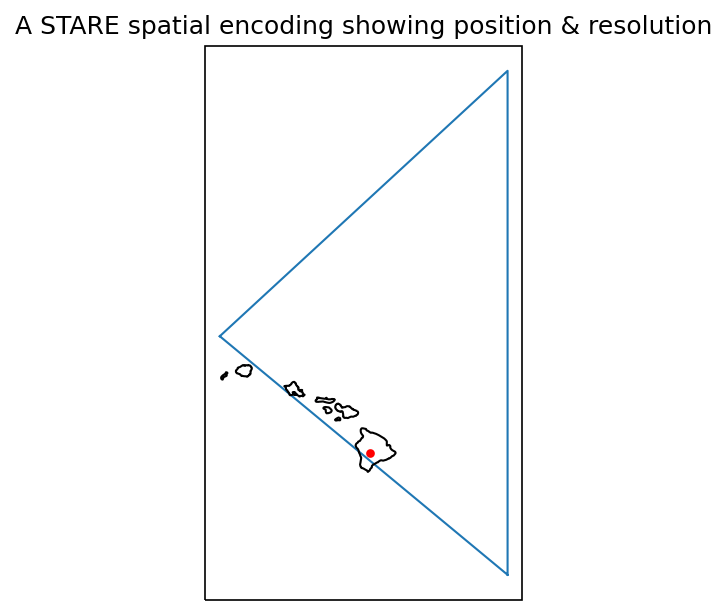

/tmp/ipykernel_6835/2374551361.py:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  zs = numpy.asarray(range(3),dtype=numpy.float)/2.0


In [4]:
# Set longitude and latitude in degrees to the summit of Mauna Loa.
lon = -155.602778
lat =   19.479444

# Set some unit assumptions
km  = 1
deg = 1

# Set the length scale of a neighborhood triangular element (trixel) about the location.
resolution_scale_km = 1000*km

# Determine the resolution, i.e. the level of the spatial quadtree, of that length scale.
spatial_resolution_level = int(pystare.spatial_resolution_from_km(resolution_scale_km))

# Calculate the spatial index value.
spatial_id = pystare.from_latlon([lat],[lon],spatial_resolution_level)

# Print to check.
print('resolution (%f km) ~ level = %i, (float %f)'%(resolution_scale_km
                                          ,spatial_resolution_level
                                          ,pystare.spatial_resolution_from_km(resolution_scale_km)))
print('(lon,lat)=(%f,%f) -> spatial_id = %s'%(lon,lat,hex16(spatial_id[0])))
print()
print('Full spatial id:              %s'%(hex16(spatial_id[0])))
print('Geolocation part (bits 61-5): %s'%(hex16(spatial_id[0] & (~31))))
print('Resolution part  (bits  4-0): %s'%(hex16(spatial_id[0] & ( 31))))

# Plot the trixel associated with the spatial index value
usr_figax, sivs_cache, sivs_triang = hello_plot(spatial_id,show_fig=False)
# usr_figax = add_coastlines(figax_container(plt.subplots(subplot_kw={'projection':proj,'transform':transf})))

# Plot the geolocation (lon,lat) as a red dot.
usr_figax.ax.scatter([lon],[lat],s=10,c='r')
plt.title('A STARE spatial encoding showing position & resolution')
plt.show()
del usr_figax

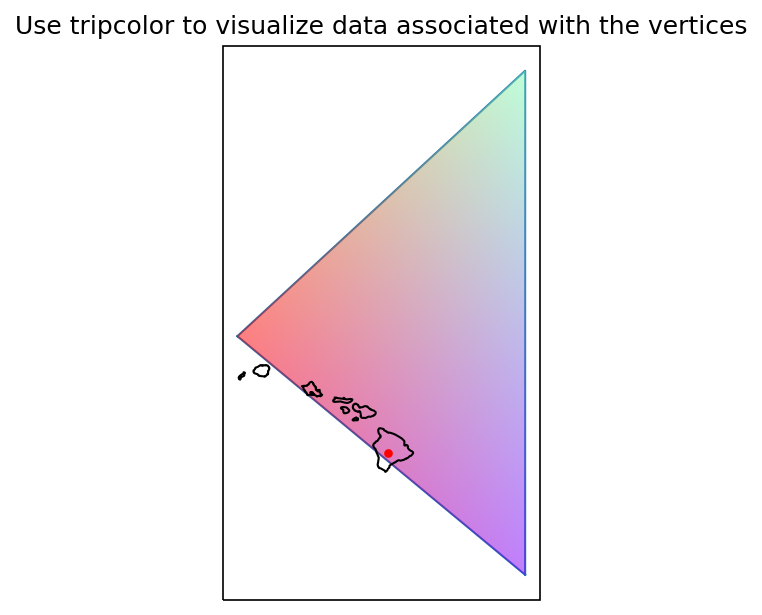

In [5]:
# cd_plt = numpy.array(
#     [[
#     0.5,0.5,0.5
#     ]]
# )
# cd_cmap = colors_to_cmap(cd_plt)

zs = numpy.asarray(range(3),dtype=numpy.float)/2.0
tripcolor_alpha = 0.5
cd_cmap=plt.cm.get_cmap('rainbow')

face_zs   = zs
face_vmin = 0.0
face_vmax = 1.0
face_edgecolors = 'k'
face_cmap   = cd_cmap
face_alpha  = tripcolor_alpha
face_lw     = 0
face_shading = 'gouraud'
rasterized = True

if True:
    # Plot the trixel associated with the spatial index value
    usr_figax, sivs_cache, sivs_triang = hello_plot(
        spatial_id
#        ,plot_options = usr_plot_options
        ,face_zs = face_zs
        ,face_vmin = face_vmin
        ,face_vmax = face_vmax
        ,face_edgecolors = 'k'
        ,face_cmap   = cd_cmap
        ,face_alpha  = tripcolor_alpha
        ,face_lw     = 0
        ,face_shading = 'gouraud'
        ,show_fig=False
        ,rasterized = rasterized
        ,verbose=False
    )
    # usr_figax = add_coastlines(figax_container(plt.subplots(subplot_kw={'projection':proj,'transform':transf})))

# Plot the geolocation (lon,lat) as a red dot.
usr_figax.ax.scatter([lon],[lat],s=10,c='r')
plt.title('Use tripcolor to visualize data associated with the vertices')
plt.show()
del usr_figax

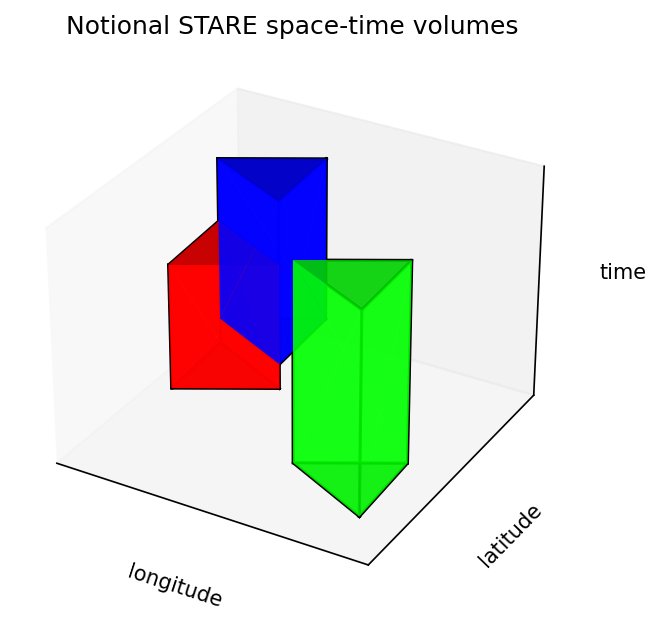

In [6]:
usr_figax = FigAxContainer((plt.figure(),plt.axes(projection='3d')))

# usr_figax, sivs_cache, sivs_triang = hello_plot(spatial_id,show_fig=False)

if False:
    sp = stare_prism(siv=1,tiv_mock=[0,1]
    #                 ,color_reverse='red'
    #                 ,color='red'
    #                 ,color_forward='red'
                    )
    # ,colors=plt.cm.CMRmap
    sp.plot1(
        usr_figax
    #    ,color='blue'
        ,alpha=0.8
    #    ,prism_edge_color='k'
    #    ,edge_color='k'
    )

if False:
    for siv in [10,11,12,13,14]:
        sp = stare_prism(siv=siv,tiv_mock=[0,1]
                         ,color=mpl.colors.rgb2hex([(siv-9.0)/5,0.5,(15-siv)/5])
                        )
        sp.plot1(
            usr_figax
            ,alpha=(siv-9)/6.0
            ,prism_edge_color='k'
        )

spatial_id[0] = (spatial_id[0] & (~31)) | 10
        
if True:
    spatial_increment = pystare.spatial_increment_from_level(spatial_id[0] & 31 )
    if True:
        siv = spatial_id[0]+spatial_increment
        sp = stare_prism(siv=siv
                         ,color=mpl.colors.rgb2hex([0,1,0])
                         # ,color=mpl.colors.rgb2hex([0.5,0.5,0.5])
                         ,tiv_mock=numpy.array([0.2,0.7,0.9,1.75])
                        )
        
        end_faces_plot = [False]*6
        end_faces_plot[0]=True
        end_faces_plot[5]=True
        
        sp.plot1_simple(
            usr_figax
            ,alpha=0.7
            ,prism_edge_color='k'
            ,end_faces_plot=end_faces_plot
        )   
        
if True:
    for siv in spatial_id:
        sp = stare_prism(siv=siv,tiv_mock=[0,1]
                         ,color=mpl.colors.rgb2hex([1,0,0])
                         # ,color=mpl.colors.rgb2hex([0.5,0.5,0.5])
                        )
        
        end_faces_plot = [False]*6
        end_faces_plot[0]=True
        end_faces_plot[5]=True
        
        sp.plot1_simple(
            usr_figax
            ,alpha=0.9
            ,prism_edge_color='k'
            ,end_faces_plot=end_faces_plot
        )      

        
if True:
    spatial_increment = pystare.spatial_increment_from_level(spatial_id[0] & 31 )
    if True:
        siv = spatial_id[0]-spatial_increment
        sp = stare_prism(siv=siv
                         ,color=mpl.colors.rgb2hex([0,0,1])
                         # ,color=mpl.colors.rgb2hex([0.5,0.5,0.5])
                         ,tiv_mock=numpy.array([0.2,0.7,0.9,1.5])
                        )
        
        end_faces_plot = [False]*6
        end_faces_plot[0]=True
        end_faces_plot[5]=True
        
        sp.plot1_simple(
            usr_figax
            ,alpha=0.9
            ,prism_edge_color='k'
            ,end_faces_plot=end_faces_plot
        )      
                 
#usr_figax.ax.axes.set_zlim3d(bottom=0.0,top=1.0)

usr_figax.ax.get_xaxis().set_ticks([])
usr_figax.ax.set_xlabel('longitude')

usr_figax.ax.get_yaxis().set_ticks([])
usr_figax.ax.set_ylabel('latitude')

usr_figax.ax.get_zaxis().set_ticks([])
usr_figax.ax.set_zlabel('time')

plt.title('Notional STARE space-time volumes')
plt.show() 
del usr_figax

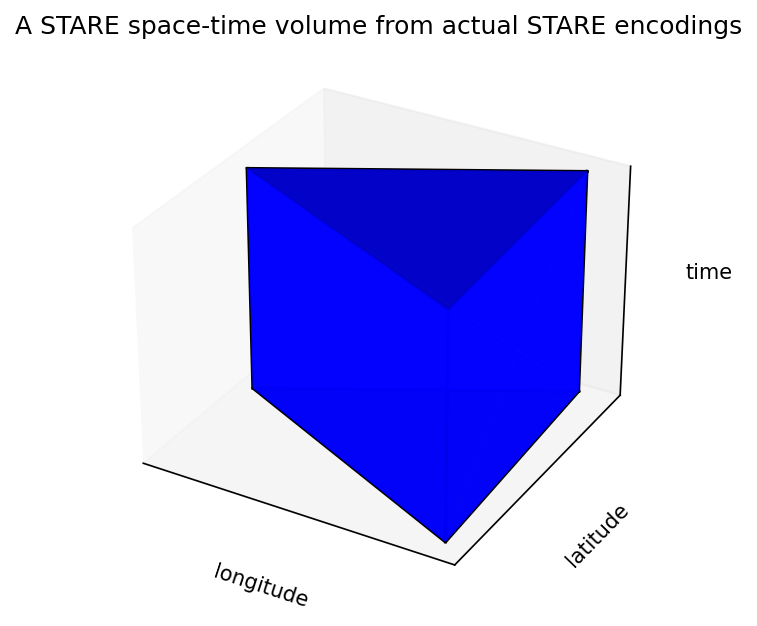

In [7]:
usr_figax = FigAxContainer((plt.figure(),plt.axes(projection='3d')))

if True:
    spatial_increment = pystare.spatial_increment_from_level(spatial_id[0] & 31 )
    if True:
        siv = spatial_id[0]-spatial_increment
        sp = stare_prism(siv=siv
                         ,tiv=numpy.array([0x1f484ade232b1b6d],dtype=numpy.int64)
                         ,color=mpl.colors.rgb2hex([0,0,1])
                        )
        
        end_faces_plot = [False]*6
        end_faces_plot[0]=True
        end_faces_plot[5]=True
        
        sp.plot1_simple(
            usr_figax
            ,alpha=0.9
            ,prism_edge_color='k'
            ,end_faces_plot=end_faces_plot
        )     

#usr_figax.ax.axes.set_zlim3d(bottom=0.0,top=1.0)

usr_figax.ax.get_xaxis().set_ticks([])
usr_figax.ax.set_xlabel('longitude')

usr_figax.ax.get_yaxis().set_ticks([])
usr_figax.ax.set_ylabel('latitude')

usr_figax.ax.get_zaxis().set_ticks([])
usr_figax.ax.set_zlabel('time')

plt.title('A STARE space-time volume from actual STARE encodings')
plt.show() 
del usr_figax

## Establish a trajectory for an aircraft observation sortie

In [8]:
n = 128
times = 0.75*numpy.arange(n,dtype=numpy.double)/(24.0*60.0) + 2440000.0
# times = numpy.full([n],fill_value=2440000.0,dtype=numpy.double)
lons  = numpy.zeros([n],dtype=numpy.double)
lats  = numpy.zeros([n],dtype=numpy.double)

for i in range(int(n)):
    lons[i] = (-157.0 + math.cos(math.pi*(i+n/4)/n)*2*math.sin(1.5*math.pi*(i)/n))
    lats[i] = (  20   + math.sin(math.pi*(i+n/4)/n)*math.cos(1.5*math.pi*(i)/n))

In [9]:
# Encode the spatial part
sivs = pystare.from_latlon(lats,lons,10)

In [10]:
# Encode the temporal part
tivs = pystare.from_julian_date(times,numpy.zeros(times.shape,dtype=numpy.double),'tai')
tivs = pystare.set_reverse_resolution(tivs,numpy.full(tivs.shape,fill_value=40,dtype=numpy.int64))
tivs = pystare.set_forward_resolution(tivs,numpy.full(tivs.shape,fill_value=40,dtype=numpy.int64))

In [11]:
# Make a color scale based on time
color_scale = 1.0 / len(sivs)
colors = [ mpl.colors.rgb2hex([(len(tivs)-i)*color_scale,0,i*color_scale]) for i in range(len(tivs)) ]

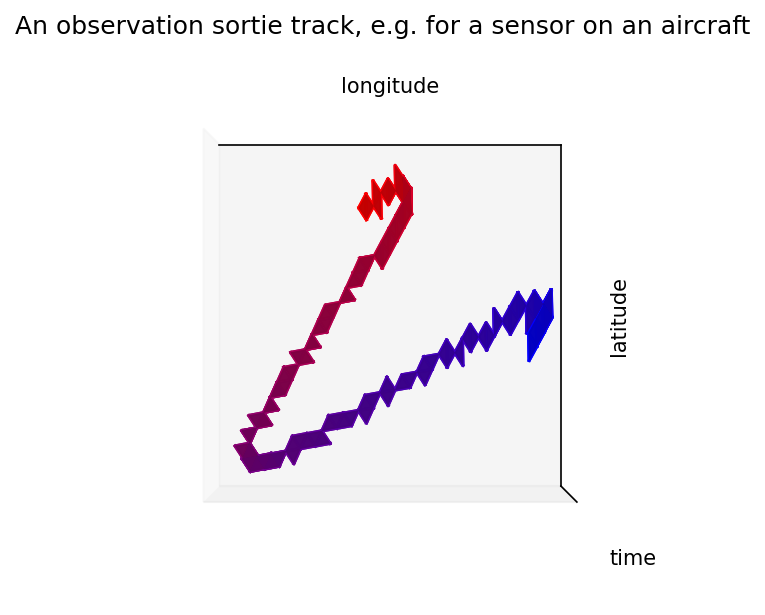

In [12]:
# Plot the trajectory
usr_figax = FigAxContainer((plt.figure(),plt.axes(projection='3d')))

if True:
    spatial_increment = pystare.spatial_increment_from_level(spatial_id[0] & 31 )
    if True:
        for i in range(len(tivs)):
        # for i in range(5):
            siv = sivs[i]
            # print('siv: ',siv)
            tiv = tivs[i]
            sp = stare_prism(siv=siv
                             ,tiv=tiv
                             ,color=colors[i]
                             # ,color=mpl.colors.rgb2hex([0.5,0.5,0.5])
                             #,tiv_mock=numpy.array([0.2,0.7,0.9,1.5])
                            )
        
            end_faces_plot = [False]*6
            end_faces_plot[0]=True
            end_faces_plot[5]=True
        
            sp.plot1_simple(
                usr_figax
                ,alpha=0.9
                ,prism_edge_color=colors[i]
                ,end_faces_plot=end_faces_plot
            )     

# add_coastlines(usr_figax,set_global=True)
            
usr_figax.ax.view_init(elev=90.,azim=-90)
# usr_figax.ax.set_top_view()
            
#usr_figax.ax.axes.set_zlim3d(bottom=0.0,top=1.0)

usr_figax.ax.get_xaxis().set_ticks([])
usr_figax.ax.set_xlabel('longitude')

usr_figax.ax.get_yaxis().set_ticks([])
usr_figax.ax.set_ylabel('latitude')

usr_figax.ax.get_zaxis().set_ticks([])
usr_figax.ax.set_zlabel('time')

plt.title('An observation sortie track, e.g. for a sensor on an aircraft')

plt.show() 
del usr_figax

In [13]:
# Check on the resolution available in Cartopy's coastline...
lines0 = list(cf.COASTLINE.with_scale('10m').geometries()) # Can be 10m, 50m, and 110m
print('len lines0: ',len(lines0))
if len(lines0) == 134:    # 110m
    line_idx = [107,108,109,110,111]
elif len(lines0) == 1428: # 50m
    line_idx = [802,803,804,805,806,807,808]
    # line_idx = [i for i in range(0,1399)]
elif len(lines0) == 4133: # 10m
    line_idx = [1672,1673,1675,1680,1685,1690,1699,1705]
else:
    print('cf.COASTLINE has unknown size or resolution')

len lines0:  4133


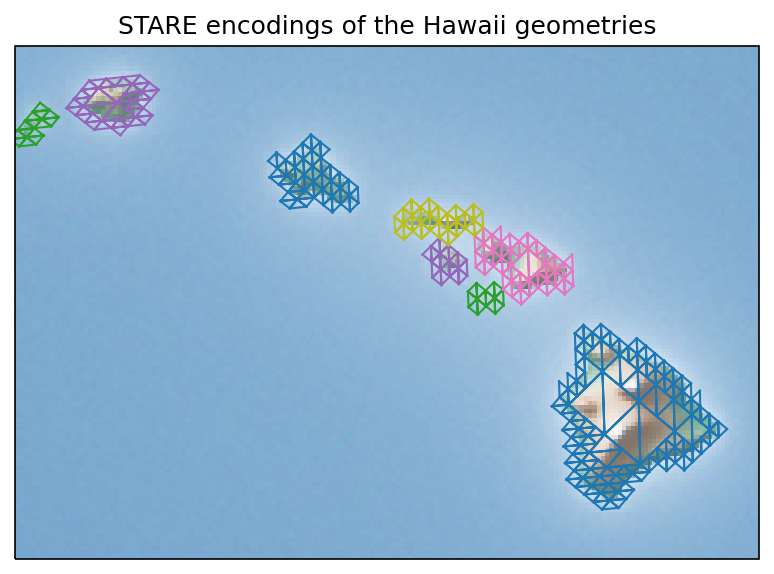

In [14]:
# Make covers from shapely polygons using non-convex hulls. Graph with overlay of Plate Carree image.

import shapely
import starepandas

figax,sivs_cache,sivs_triang = hello_plot(set_coastlines=False,set_global=False,show_fig=False)  

lines = [ lines0[i] for i in line_idx ]
multiline = shapely.geometry.MultiLineString(lines)

# figax.ax.add_geometries(multiline,cf.COASTLINE.crs,color='c',alpha=0.5)
# figax.ax.set_extent(numpy.array(multiline.bounds)[[0,2,1,3]])

# lons,lats = lonlat_from_coords(list(lines[0].coords))

# cover_resolution = 12
cover_resolution = 10

covers = []
for k in range(len(lines)):
#    lons,lats = lonlat_from_coords(list(lines[k].coords))
    covers = covers + [starepandas.sids_from_polygon(shapely.geometry.polygon.orient(shapely.geometry.Polygon(lines[k]),1)
                                       ,level=cover_resolution,convex=False)]
    
    #  ,resolution=cover_resolution,nonconvex=True)]
    
#    covers = covers + [pystare.to_nonconvex_hull_range_from_latlon(lats,lons,resolution=10)]
#    covers = covers + [pystare.to_hull_range_from_latlon(lats,lons,resolution=10)]

    # Default Cartopy background imagery
    # figax.ax.stock_img()

    # For an example of how to add imagery for background_img, see extras/05-FetchNaturalEarth-1.
    figax.ax.background_img(name='ne_shaded') # Identical to stock_img.
    # figax.ax.background_img(name='ne1_50m_sr_w')
    # figax.ax.background_img(name='ne1_10m_sr_w_dr')
    figax.ax.background_img(name='hypso_50m_sr_w')
    # figax.ax.background_img(name='hypso_10m_sr_w_ob_dr')

    
    # figax,sivs_cache,sivs_triang = hello_plot(pysta.expand_intervals(covers[k],8),figax,show=False)
    figax,sivs_cache,sivs_triang = hello_plot(covers[k],figax,show_fig=False)
                      
figax.ax.set_extent(numpy.array([-160.3, 18.5, -154.5, 22.5])[[0,2,1,3]])

plt.title('STARE encodings of the Hawaii geometries')
plt.show() # May have to Cell->Current Outputs->Toggle Scrolling to see full figure.
del figax

In [15]:
# Makes come colors
cover_color_scale = 1.0 / len(covers)
cover_colors = [ mpl.colors.rgb2hex([i*cover_color_scale,1-i*cover_color_scale,i*cover_color_scale]) for i in range(len(covers)) ]

## Plot a sortie observation track

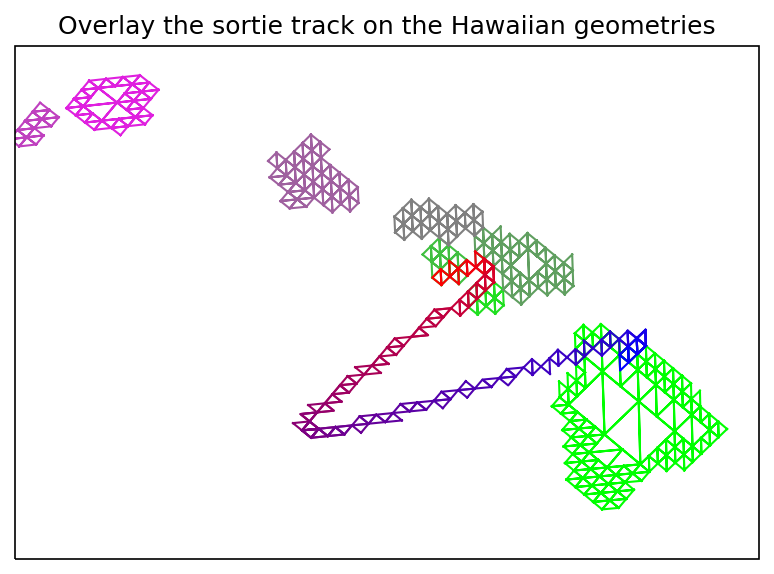

In [16]:
figax,sivs_cache,sivs_triang = hello_plot(set_coastlines=False,set_global=False,show_fig=False,rasterized=True)  

for k in range(len(covers)):

    figax,sivs_cache,sivs_triang = hello_plot(covers[k],figax,show_fig=False,color=cover_colors[k],rasterized=True)

# Note that the sivs track is colored from red to blue according to time.
for s in range(len(sivs)):
    figax,sivs_cache,sivs_triang = hello_plot([sivs[s]],figax,color=colors[s],show_fig=False,rasterized=True)

figax.ax.set_extent(numpy.array([-160.3, 18.5, -154.5, 22.5])[[0,2,1,3]])

plt.title('Overlay the sortie track on the Hawaiian geometries')
plt.show() # May have to Cell->Current Outputs->Toggle Scrolling to see full figure.
del figax

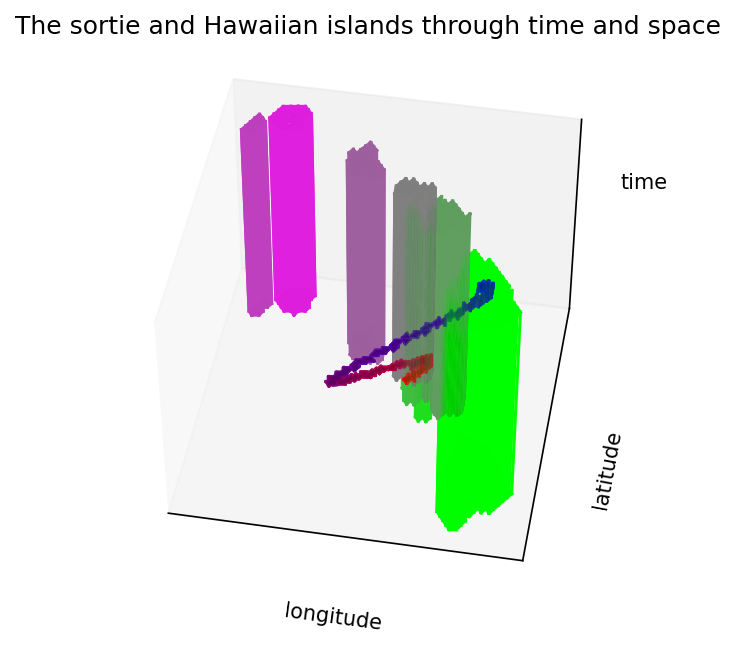

In [17]:
usr_figax = FigAxContainer((plt.figure(),plt.axes(projection='3d')))

if True:
    tiv0 = pystare.from_julian_date(times[0:1]-0.01,numpy.zeros([1],dtype=numpy.double),'tai')
    tiv0 = pystare.set_reverse_resolution(tiv0,numpy.array([45],dtype=numpy.int64))
    tiv0 = pystare.set_forward_resolution(tiv0,numpy.array([25],dtype=numpy.int64))
    
    for ic in range(len(covers)):
        color = cover_colors[ic]
        for s in covers[ic]:
            # print('siv: ',siv)
            siv = s
            tiv = tiv0
            sp = stare_prism(siv=siv
                             ,tiv=tiv
                             ,color=color
                             # ,color=mpl.colors.rgb2hex([0.5,0.5,0.5])
                             #,tiv_mock=numpy.array([0.2,0.7,0.9,1.5])
                            )
        
            end_faces_plot = [False]*6
            end_faces_plot[0]=True
            end_faces_plot[5]=True
        
            sp.plot1_simple(
                usr_figax
                ,alpha=0.025
                ,prism_edge_color=color
                ,end_faces_plot=end_faces_plot
                ,rasterized=True
            )    

if True:
    if True:
        for i in range(len(tivs)):
        # for i in range(5):
            siv = sivs[i]
            # print('siv: ',siv)
            tiv = tivs[i]
            sp = stare_prism(siv=siv
                             ,tiv=tiv
                             ,color=colors[i]
                             # ,color=mpl.colors.rgb2hex([0.5,0.5,0.5])
                             #,tiv_mock=numpy.array([0.2,0.7,0.9,1.5])
                            )
        
            end_faces_plot = [False]*6
            end_faces_plot[0]=True
            end_faces_plot[5]=True
        
            sp.plot1_simple(
                usr_figax
                ,alpha=0.9
                ,prism_edge_color=colors[i]
                ,end_faces_plot=end_faces_plot
                ,rasterized=True
            )


# add_coastlines(usr_figax,set_global=True)
            
# usr_figax.ax.view_init(elev=90.,azim=-90)
usr_figax.ax.view_init(elev=45.,azim=-80)
# usr_figax.ax.set_top_view()
            
#usr_figax.ax.axes.set_zlim3d(bottom=0.0,top=1.0)

usr_figax.ax.get_xaxis().set_ticks([])
usr_figax.ax.set_xlabel('longitude')

usr_figax.ax.get_yaxis().set_ticks([])
usr_figax.ax.set_ylabel('latitude')

usr_figax.ax.get_zaxis().set_ticks([])
usr_figax.ax.set_zlabel('time')

plt.title('The sortie and Hawaiian islands through time and space')
plt.show() 
del usr_figax

## Prepare an extended phenomenon for the aircraft to observe

In [18]:
# The phenomena is circular with a radius of 2 degrees.
# We expand the spatial encoding to a resolution of 10.
deg = 1 # unit
finest_resolution=10
circle=pystare.expand_intervals(
    pystare.sid2circular_cover(
      pystare.from_latlon(
        numpy.array([20.0],dtype=numpy.double)
        ,numpy.array([-158.0],dtype=numpy.double)
        ,12)[0]
      ,2*deg,finest_resolution)
      ,finest_resolution)

In [19]:
# We synthesize some harmonizable data.
# Here we model the phenomena signature as a gaussian 
# centered on the circle defined above.
# For simplicity we associate the data with STARE
# spatial centers.
d=numpy.zeros(circle.shape,dtype=numpy.double)
lat,lon = pystare.to_latlon(circle)
lon=lon-360.0
d[:] = numpy.exp(-1.0*((lat-20.0)**2 + (lon+158.0)**2))
if True:
    print('d len ',len(d))
    print('c len ',len(circle))
    print('d mx  ',numpy.amax(d))

d len  3330
c len  3330
d mx   0.9907995184211007


In [20]:
# print(numpy.amin(d),numpy.amax(d))

In [21]:
# For plotting we associate data with the STARE 
# spatial vertices.
d_zs = numpy.zeros(3*d.size,dtype=numpy.double)
for i in range(d.size):
    d_zs[3*i]   = d[i]
    d_zs[3*i+1] = d[i]
    d_zs[3*i+2] = d[i]

In [22]:
# Make some colors
d_color_offset = 0.0
d_color_scale  = 1.0
d_cmap = plt.cm.get_cmap('rainbow')
d_colors = [ mpl.colors.rgb2hex(d_cmap((d[i]-d_color_offset)*d_color_scale)) for i in range(len(circle)) ]

In [23]:
d_zs_cmap = plt.cm.get_cmap('rainbow')
d_zs_colors = [ mpl.colors.rgb2hex(d_cmap((d[i]-d_color_offset)*d_color_scale)) for i in range(len(circle)) for j in range(3) ]

face_zs          [0.17637444 0.17637444 0.17637444 ... 0.01833309 0.01833309 0.01833309]
face_edgecolors  face
face_lw          0.5
face_shading     gouraud
face_vmin        0
face_vmax        0.9907995184211007
face_cmap        <matplotlib.colors.LinearSegmentedColormap object at 0x7f5f04a852a0>
face_alpha       0.75
po transform     +proj=lonlat +datum=WGS84 +ellps=WGS84 +no_defs +type=crs
rasterized       True
face_zs no change
siv_triang len:  9990
face_zs    len:  9990


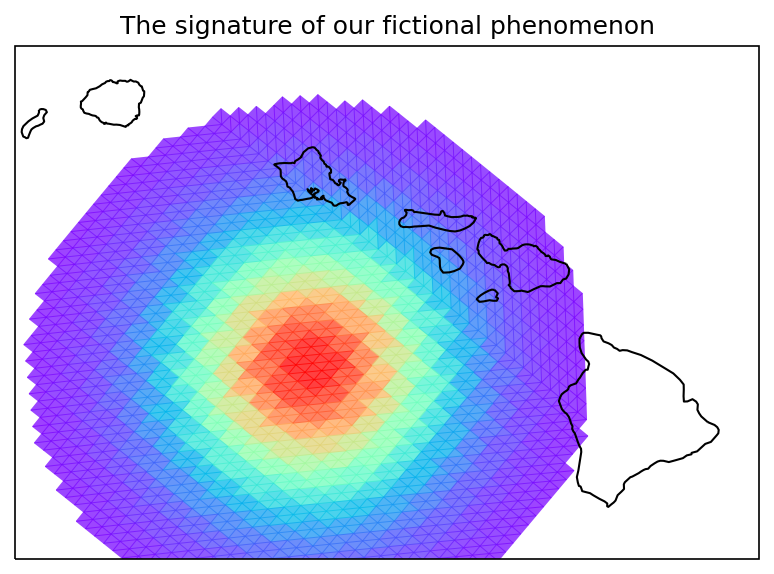

In [24]:
# Plot the phenomenon's signature
usr_figax,sivs_cache,sivs_triang \
    = hello_plot(
        circle
        ,show_fig=False
        ,face_zs=d_zs
        ,face_vmin = 0
        ,face_vmax = numpy.amax(d_zs)
        ,face_edgecolors = 'face'
        ,face_cmap   = plt.cm.get_cmap('rainbow')
        ,face_alpha  = 0.75
        ,triplot = False
)
usr_figax.ax.set_extent(numpy.array([-160.3, 18.5, -154.5, 22.5])[[0,2,1,3]])
plt.title('The signature of our fictional phenomenon')
plt.show()
del usr_figax

## Now establish the sortie observations of the phenomenon

In [25]:
# Do it the easy way. Make a dictionary of the circle data.
data_d = {}
for ic in range(len(circle)):
    data_d[circle[ic]] = d[ic]

In [26]:
# Find the data along the path sivs
data_sivs = numpy.zeros(sivs.size,dtype=numpy.double)
for is_ in range(len(sivs)):
    # Remove sub-resolution position information
    idx = pystare.spatial_clear_to_resolution(sivs[is_])
    try:
        data_sivs[is_] = data_d[idx]
    except:
        # "Fill data" for when the aircraft is not in the phenomenon
        data_sivs[is_] = 0
i_invalid = numpy.where(numpy.isnan(data_sivs))
i_valid   = numpy.where(numpy.isfinite(data_sivs))

In [27]:
# Triple it, one for each vertex for plotting
data_sivs_zs = numpy.zeros(3*sivs.size,dtype=numpy.double)
for i in range(len(sivs)):
    data_sivs_zs[3*i+0] = data_sivs[i]
    data_sivs_zs[3*i+1] = data_sivs[i]
    data_sivs_zs[3*i+2] = data_sivs[i]

In [28]:
# Play with the colors
# ds_vmin = numpy.min(data_sivs[i_valid])
# ds_vmax = numpy.max(data_sivs[i_valid])

ds_vmin = numpy.min(data_sivs[i_valid])
ds_vmax = numpy.amax(d_zs)

ds_color_scale  = 1
ds_color_offset = 0

In [29]:
ds_cmap = plt.cm.get_cmap('rainbow')
ds_colors = [ mpl.colors.rgb2hex(ds_cmap((data_sivs[i]-ds_color_offset)*ds_color_scale)) for i in range(len(sivs)) ]

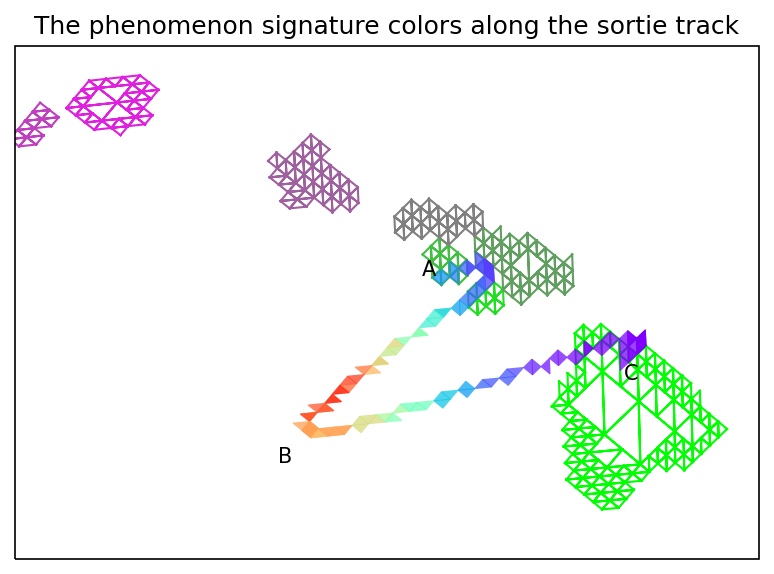

In [30]:
# Now plot the phenomenon signature colors along the track of the aircraft

usr_figax,sivs_cache,sivs_triang = hello_plot(set_coastlines=False,set_global=False,show_fig=False,rasterized=True)  

for k in range(len(covers)):
    usr_figax,sivs_cache,sivs_triang = hello_plot(covers[k],usr_figax,show_fig=False,color=cover_colors[k],rasterized=True)
    
if True:
    usr_figax,sivs_cache,sivs_triang = hello_plot(sivs
                                                    ,usr_figax
                                                    ,show_fig=False
                                                    ,rasterized=True
                                                    ,triplot=False
                                                    ,face_zs = data_sivs_zs
                                                    ,face_cmap = plt.cm.get_cmap('rainbow')
                                                    ,face_vmin = 0
                                                    ,face_vmax = numpy.amax(d_zs)
                                                    ,face_edgecolors = 'face'
                                                    ,face_alpha  = 0.75
                                                    ,verbose = False
                                                    )
    
if False:
    usr_figax,sivs_cache,sivs_triang \
        = hello_plot(
            circle
            ,usr_figax
            ,show_fig=False
            ,face_zs=d_zs
            ,face_vmin = 0
            ,face_vmax = numpy.amax(d_zs)
            ,face_edgecolors = 'face'
            ,face_cmap   = plt.cm.get_cmap('rainbow')
            ,face_alpha  = 0.75
            ,triplot = False
            ,rasterized=True
)

if True:
    # print('sivs len: ',len(sivs))
    i=0; 
    xy = pystare.to_latlon(sivs[i:i+1])
    usr_figax.ax.annotate('A'
                          ,xy=[xy[1][0]-360.0-0.125,xy[0][0]]
                          ,xycoords='data')
    
    i=64; 
    xy = pystare.to_latlon(sivs[i:i+1])
    usr_figax.ax.annotate('B'
                          ,xy=[xy[1][0]-360.0-0.25,xy[0][0]-0.25]
                          ,xycoords='data')
    
    i=127; 
    xy = pystare.to_latlon(sivs[i:i+1])
    usr_figax.ax.annotate('C'
                          ,xy=[xy[1][0]-360.0,xy[0][0]-0.125]
                          ,xycoords='data')

usr_figax.ax.set_extent(numpy.array([-160.3, 18.5, -154.5, 22.5])[[0,2,1,3]])

plt.title('The phenomenon signature colors along the sortie track')
plt.show() # May have to Cell->Current Outputs->Toggle Scrolling to see full figure.
del usr_figax

sivs len:  128


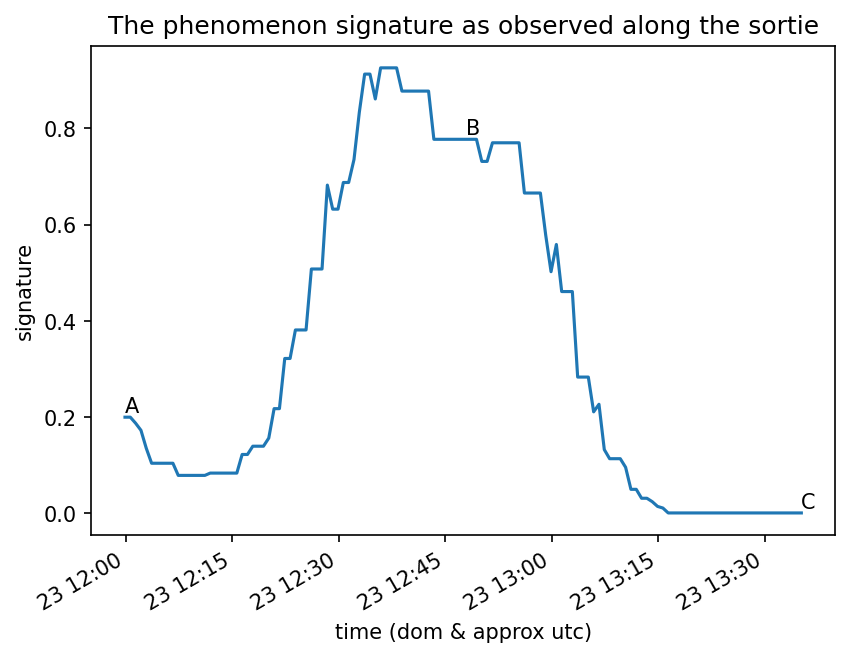

In [31]:
# Now show the time series along the track

fig, ax = plt.subplots()
t_ = numpy.array(pystare.to_ms_since_epoch_utc(tivs),dtype='datetime64[ms]')
plt.plot(t_,data_sivs)

if True:
    print('sivs len: ',len(sivs))
    i=0; 
    ax.annotate('A'
                ,xy=[t_[i],data_sivs[i]+0.01]
                ,xycoords='data')
    
    i=64; 
    ax.annotate('B'
                ,xy=[t_[i],data_sivs[i]+0.01]
                ,xycoords='data')
    
    i=127; 
    ax.annotate('C'
                ,xy=[t_[i],data_sivs[i]+0.01]
                ,xycoords='data')
    
fig.autofmt_xdate()
plt.title('The phenomenon signature as observed along the sortie')
ax.set_ylabel('signature')
ax.set_xlabel('time (dom & approx utc)')
plt.show()
del fig, ax

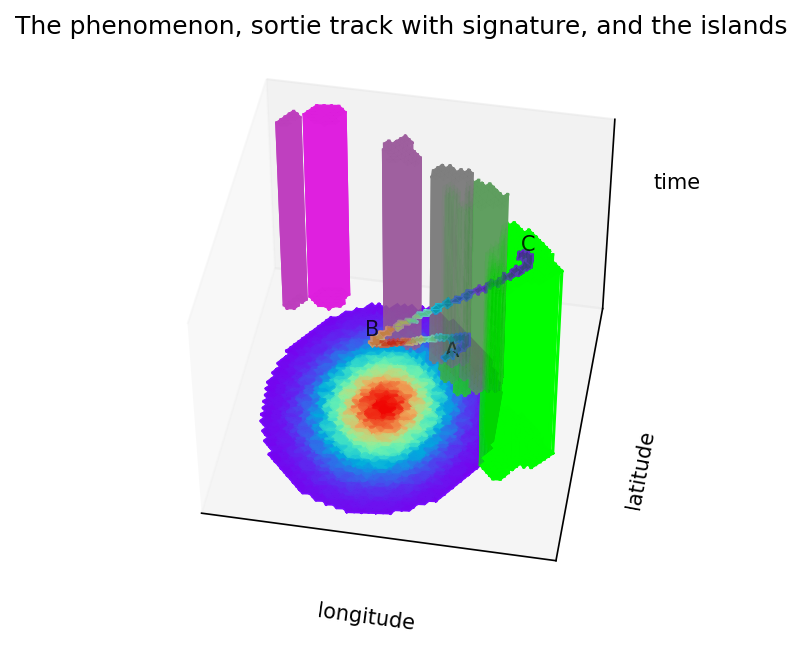

In [32]:
# Plot the sortie through space and time, colored with the signature data

usr_figax = FigAxContainer((plt.figure(),plt.axes(projection='3d')))

if True:
    tiv0 = pystare.from_julian_date(times[0:1]-0.01,numpy.zeros([1],dtype=numpy.double),'tai')
    tiv0 = pystare.set_reverse_resolution(tiv0,numpy.array([45],dtype=numpy.int64))
    tiv0 = pystare.set_forward_resolution(tiv0,numpy.array([25],dtype=numpy.int64))
    
if True:
    if True:
        tiv1=tiv0
        tiv1 = pystare.set_reverse_resolution(tiv1,numpy.array([45],dtype=numpy.int64))
        tiv1 = pystare.set_forward_resolution(tiv1,numpy.array([45],dtype=numpy.int64))
        
        for i in range(len(circle)):
            # print('siv: ',siv)
            siv = circle[i]
            tiv = tiv1
            sp = stare_prism(siv=siv
                             ,tiv=tiv
                             ,color=d_colors[i]
                             # ,color=mpl.colors.rgb2hex([0.5,0.5,0.5])
                             #,tiv_mock=numpy.array([0.2,0.7,0.9,1.5])
                            )
        
            end_faces_plot = [False]*6
            end_faces_plot[0]=True
            end_faces_plot[5]=False
        
            sp.plot1_simple(
                usr_figax
                ,alpha=0.25
                ,prism_edge_color=d_colors[i]
                ,end_faces_plot=end_faces_plot
                ,rasterized=True
            )    
    
    for ic in range(len(covers)):
        color = cover_colors[ic]
        for s in covers[ic]:
            # print('siv: ',siv)
            siv = s
            tiv = tiv0
            sp = stare_prism(siv=siv
                             ,tiv=tiv
                             ,color=color
                            )
        
            end_faces_plot = [False]*6
            end_faces_plot[0]=True
            end_faces_plot[5]=True
        
            sp.plot1_simple(
                usr_figax
                ,alpha=0.025
                ,prism_edge_color=color
                ,end_faces_plot=end_faces_plot
                ,rasterized=True
            )    

if True:
    if True:
        for i in range(len(tivs)):
        # for i in range(5):
            siv = sivs[i]
            # print('siv: ',siv)
            tiv = tivs[i]
            sp = stare_prism(siv=siv
                             ,tiv=tiv
                             ,color=ds_colors[i]
                            )
        
            end_faces_plot = [False]*6
            end_faces_plot[0]=True
            end_faces_plot[5]=True
        
            sp.plot1_simple(
                usr_figax
                ,alpha=0.9
                ,prism_edge_color=ds_colors[i]
                ,end_faces_plot=end_faces_plot
                ,rasterized=True
            )


# add_coastlines(usr_figax,set_global=True)
            
# usr_figax.ax.view_init(elev=90.,azim=-90)
usr_figax.ax.view_init(elev=45.,azim=-80)
# usr_figax.ax.set_top_view()
            
#usr_figax.ax.axes.set_zlim3d(bottom=0.0,top=1.0)

usr_figax.ax.get_xaxis().set_ticks([])
usr_figax.ax.set_xlabel('longitude')

usr_figax.ax.get_yaxis().set_ticks([])
usr_figax.ax.set_ylabel('latitude')

usr_figax.ax.get_zaxis().set_ticks([])
usr_figax.ax.set_zlabel('time')

# usr_figax.ax.text(-158,20,2440000.0,'A')
if True:  
    t_d = pystare.to_julian_date(tivs,'tai') # Convert to TAI['days']
    idx=[0,64,127]; syms=['A','B','C']
    delta_lon  = [0, -0.2,  0]
    delta_time = [0,  0.001,0.0025]
    for j in range(3):
        i=idx[j]
        xy = pystare.to_latlon(sivs[i:i+1])
        lon_ = xy[1][0]-360.0+delta_lon[j]
        lat_ = xy[0][0]
        tim_ = t_d[0][i]+t_d[1][i]+delta_time[j]
        sym=syms[j]
        
        usr_figax.ax.text(lon_, lat_, tim_,sym)

plt.title('The phenomenon, sortie track with signature, and the islands')
plt.show() 
del usr_figax